# API 4 ML

# Consignas

El desafío actual consiste en poder generar agrupaciones mediante K-means que permitan calcular el grado de precisión de una predicción no supervisada. Para ello, nos solicitan analizar la base de datos de la flor del iris y clasificar información según el orden que se presenta a continuación.
1. Debemos describir brevemente la información que nos entrega la base de datos. Para ello, puede ser útil cargar la base mediante el siguiente código:
from sklearn import datasets
iris = datasets.load_iris()
2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del sépalo).
3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.
4. Debemos, además, graficar los clusters.
5. Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.

Consiga 1

Debemos describir la informacion que nos entrega la base de datos.

# Información del dataset

El dataset consta de 150 muestras de flores iris, divididas equititativamente en 3 especies:


*   Iris setosa
*   Iris versicolor
*   Iirs virginica

Para cada muestra, se registraron  4 caracteristicas (features) numérias (medidas de centimetros):


*   Largo del sépalo (Sepal lenght)
*   Ancho del sépalo (Sepal width)
*   Largo del pétalo (Petal lenght)
*   Ancho del pétalo (Petal width)


En un problema **NO SUPERVISADO** (como este), ignoramos las etiquetas de las especies (el nombre de la flor) e intentamos que el algoritmo agrupe las flores basándose únicamente en sus medidas fisicas.









# Importamos librerias

In [10]:
# importar pandas
import pandas as pd
# importar matplotlib
import matplotlib.pyplot as plt
# importar seaborn
import seaborn as sns
# importar el modelo de KMeans
from sklearn.cluster import KMeans
# importar datasets de sklearn
from sklearn.datasets import load_iris

# Carga de dataset

Información dataset iris

In [11]:
# Carga de datos
iris = load_iris()



*   Pisar el dataset a DataFrame



In [12]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [13]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# Consigna 2

Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del sépalo).

# Gráficos sépalos


--- Graficar relaciones iniciales ---


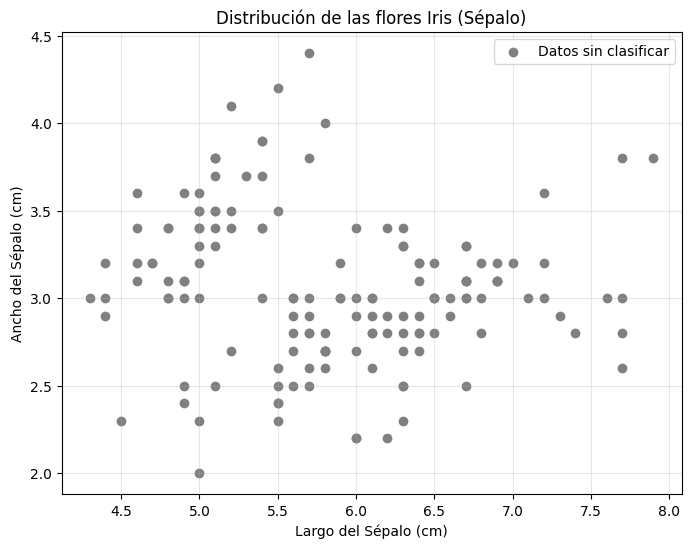

In [14]:
# --------------------------------------------------------
# Graficar relaciones (Antes del Clustering)
# --------------------------------------------------------
print("\n--- Graficar relaciones iniciales ---")

# --- GRÁFICO 1: SÉPALOS ---

# Vamos a graficar 'sepal length (cm)' vs 'sepal width (cm)'

x_axis = data['sepal length (cm)'] # Largo del sépalo
y_axis = data['sepal width (cm)'] # Ancho del sépalo

plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_axis, c='gray', label='Datos sin clasificar')
plt.title('Distribución de las flores Iris (Sépalo)')
plt.xlabel('Largo del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Grafico pétalos

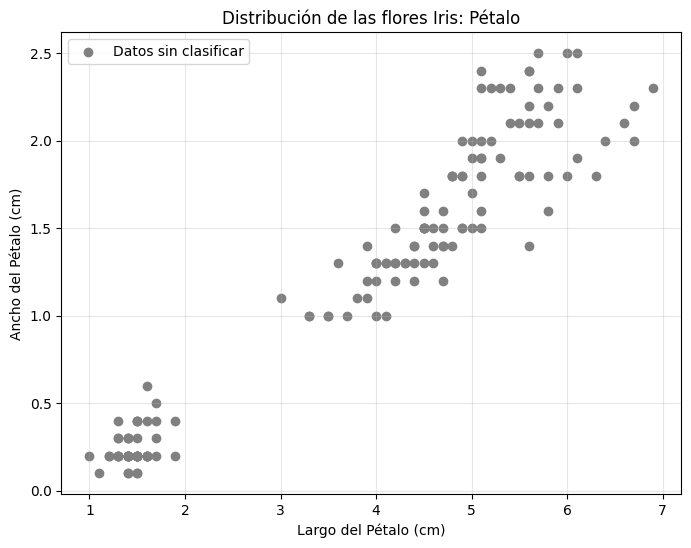

In [15]:
# --- GRÁFICO 2: PÉTALOS ---

# Ahora graficamos 'petal length (cm)' vs 'petal width (cm)'

x_axis_petal = data['petal length (cm)']  # Largo del pétalo
y_axis_petal = data['petal width (cm)']   # Ancho del pétalo

plt.figure(figsize=(8, 6))
# Usamos un marcador diferente ('s' = square) para distinguirlo visualmente
plt.scatter(x_axis_petal, y_axis_petal, c='gray', label='Datos sin clasificar')
plt.title('Distribución de las flores Iris: Pétalo')
plt.xlabel('Largo del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Consiga 3

Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.

# LLamando a K-Means

In [16]:
# Llamamos al modelo.
# n_clusters=4: le pedimos que busque 4 grupos.
# n_init=10: Hará 10 intentos con semillas aleatorias para encontrar el mejor resultado.
# random_state=42: Para asegurar que siempre nos dé el mismo resultado (reproducibilidad).

print('\n--- Configurando K-Means (K=4) ---')
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)


--- Configurando K-Means (K=4) ---




*   Entrenamos el modelo



In [17]:
# Entrenar el Modelo
# Aquí ocurre la "magia". El algoritmo ajusta los centroides a los datos.
# Nota: Solo le pasamos 'X' (data), no hay 'y' (etiquetas).

print('\n--- Entrenando el modelo... ---')
kmeans.fit(data)
print('Modelo entrenado exitosamente!')


--- Entrenando el modelo... ---
Modelo entrenado exitosamente!


# Revisión de atributos



*   Centroides de cada close



In [18]:
# ---
# 2 # Revisar Atributos del Modelo
# 3 # ---
# 4 Una vez entrenado, inspeccionamos qué aprendió el modelo.

print('\n--- Resultados del Modelo ---')

# 8 # 1. Centroides: Las coordenadas centrales de cada uno de los 4 grupos.
print("\nCoordenadas de los 4 Centroides (Cluster Centers):\n")
print(kmeans.cluster_centers_)


--- Resultados del Modelo ---

Coordenadas de los 4 Centroides (Cluster Centers):

[[6.2525     2.855      4.815      1.625     ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.9125     3.1        5.846875   2.13125   ]]




*   Etiquetas de las clases



In [19]:
# 2 # Etiquetas: A qué grupo (0, 1, 2, 3, 4) asignó cada flor.
# 3 # Mostramos solo las primeras 10 para no llenar la pantalla.
# Nota: La imagen muestra *todas* las etiquetas, no solo las 10 primeras.
print("\nEtiquetas asignadas:")
print(kmeans.labels_)


Etiquetas asignadas:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0
 0 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 0 3 3 3 0 0
 3 0]




*   Inercia del modelo



In [20]:
# 1 # 3. Inercia: la suma de las distancias al cuadrado dentro de los clusters.
# 2 # Mide qué tan "compactos" son los grupos (Menor es mejor).
print(f"\nInercia del modelo (Distancia Intra-cluster): {kmeans.inertia_:.2f}")


Inercia del modelo (Distancia Intra-cluster): 57.23




*   Agregamos la columna "Cluster" al DataFrame


In [21]:
# Visualización y Análisis (Asignando Clusters)
# Agregamos la columna 'Cluster' a nuestro DataFrame original para poder graficar.
data['Cluster'] = kmeans.labels_
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


# Consigna 4

Debemos, además, graficar los clusters.

# Visualización de resultados


Generando gráfico para SÉPALOS...


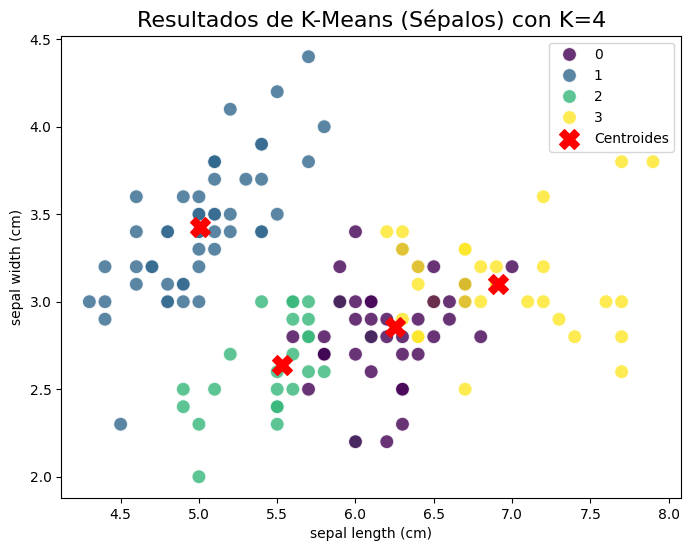

Análisis Visual: Observamos cómo los mismos grupos se ven diferentes según la vista.


In [22]:
# GRÁFICO 1: SÉPALOS (Sepal Length vs Sepal Width)

print("\nGenerando gráfico para SÉPALOS...")
plt.figure(figsize=(8, 6))

# Usamos las columnas de sépalos
sns.scatterplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='Cluster',  # Mismo cluster, distinta vista
    palette='viridis',
    s=100,
    alpha=0.8
)

# Graficamos los CENTROIDES correspondientes a sépalos
# Sépalos son índices 0 y 1.
plt.scatter(
    kmeans.cluster_centers_[:, 0], # X del centroide (Largo Sépalo)
    kmeans.cluster_centers_[:, 1], # Y del centroide (Ancho Sépalo)
    c='red', s=200, marker='X', label='Centroides'
)

plt.title("Resultados de K-Means (Sépalos) con K=4", fontsize=16)
plt.legend()
plt.show()

print("Análisis Visual: Observamos cómo los mismos grupos se ven diferentes según la vista.")


Generando gráfico para PÉTALOS...


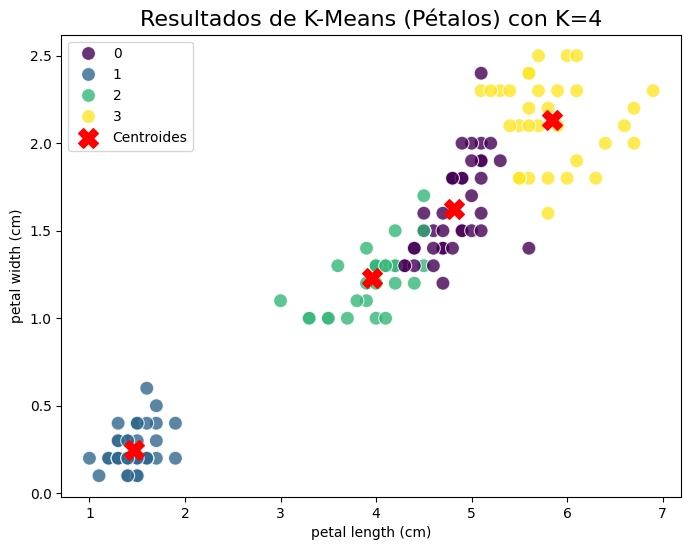

In [23]:
# GRÁFICO 2: PÉTALOS (Petal Length vs Petal Width)
# Análisis Visual: observamos cómo los mismos grupos se ven diferentes según la vista.

print("\nGenerando gráfico para PÉTALOS...")
plt.figure(figsize=(8, 6))

# Usamos seaborn para facilitar el coloreado por categoría (hue)
sns.scatterplot(
    data=data,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster', # Colorear según el grupo asignado
    palette='viridis', # Paleta de colores distintiva
    s=100, # Tamaño de los puntos
    alpha=0.8 # Transparencia
)

# También graficamos los CENTROIDES para ver dónde quedaron
# Pétalos son índices 2 y 3.
plt.scatter(
    kmeans.cluster_centers_[:, 2], # X del centroide (Largo Pétalo)
    kmeans.cluster_centers_[:, 3], # Y del centroide (Ancho Pétalo)
    c='red', s=200, marker='X', label='Centroides' # Marca roja grande
)

plt.title("Resultados de K-Means (Pétalos) con K=4", fontsize=16)
plt.legend()
plt.show()

# Consigna 5

Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.


--- Bonus: Método del Codo (Buscando la K óptima) ---


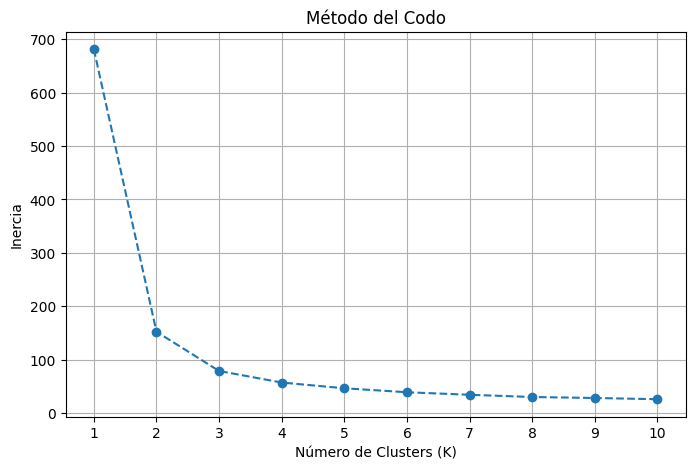

Conclusión: Observamos dónde la curva hace un 'codo' (probablemente en K=3 ).
Ese es el número óptimo de grupos para este dataset.


In [24]:
# ------------------------------------------------------
# Método del Codo (Elbow Method)
# ------------------------------------------------------
# Para saber cuál es la K óptima, probamos varios valores (ej. de 1 a 10)
# y graficamos la inercia.

print('\n--- Bonus: Método del Codo (Buscando la K óptima) ---')

inercia = []
rango_k = range(1, 11)

for k in rango_k:
    # Usamos n_init=10 (o 18 como en el comentario, aunque 10 es más común)
    modelo_k = KMeans(n_clusters=k, n_init=10, random_state=42)
    # Usamos data.iloc[:, :-1] para quitar la columna 'Cluster' que agregamos antes
    modelo_k.fit(data.iloc[:, :-1])
    inercia.append(modelo_k.inertia_)

# Graficamos la curva
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inercia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rango_k)
plt.grid(True)
plt.show()

print("Conclusión: Observamos dónde la curva hace un 'codo' (probablemente en K=3 ).")
print("Ese es el número óptimo de grupos para este dataset.")

# Reentrenamos el modelo con K=3

In [25]:
# Creamos el DataFrame data_2 (Se asume que es una copia de data sin la columna 'Cluster')
data_2 = pd.DataFrame(iris.data, columns = iris.feature_names)

In [26]:
# Llamamos al modelo.
# n_clusters=3: le pedimos que busque 3 grupos.
# n_init=10: Hará 10 intentos con semillas aleatorias para encontrar el mejor resultado.
# random_state=42: Para asegurar que siempre nos dé el mismo resultado (reproducibilidad).

print('\n--- Configurando K-Means (K=3) ---')
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)


--- Configurando K-Means (K=3) ---


In [27]:
# Entrenar el Modelo
# Aquí ocurre la "magia". El algoritmo ajusta los centroides a los datos.
# Nota: Solo le pasamos 'X' (data), no hay 'y' (etiquetas).

print('\n--- Entrenando el modelo... ---')
kmeans.fit(data_2) # Entrenando con el nuevo DataFrame
print('Modelo entrenado exitosamente!')


--- Entrenando el modelo... ---
Modelo entrenado exitosamente!


In [28]:
# Agregamos la columna "Cluster" a nuestro DataFrame original para poder graficar

data_2['Cluster'] = kmeans.labels_
data_2.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1



Generando gráfico para SÉPALOS...


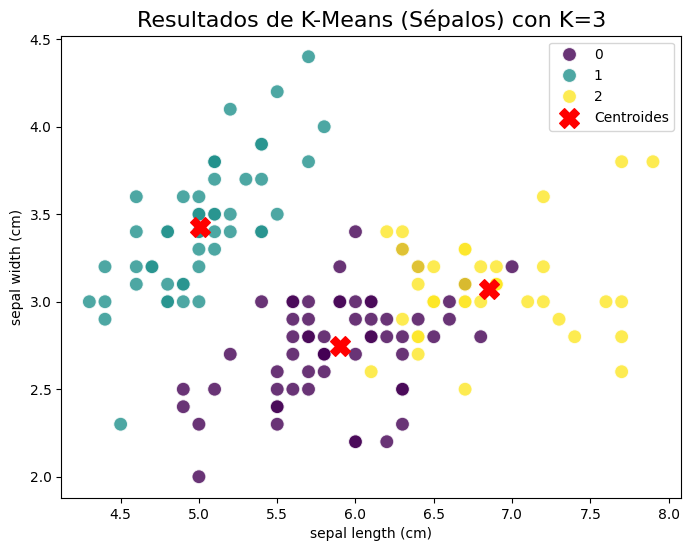

Análisis Visual: Observamos cómo los mismos grupos se ven diferentes según la vista.


In [29]:

# GRÁFICO 1: SÉPALOS (Sepal Length vs Sepal Width)

print("\nGenerando gráfico para SÉPALOS...")
plt.figure(figsize=(8, 6))

# 7 # Usamos las columnas de sépalos
sns.scatterplot(
    data=data_2,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='Cluster',      # Mismo cluster, distinta vista
    palette='viridis',
    s=100,
    alpha=0.8
)

# 18 # Graficamos los CENTROIDES correspondientes a sépalos
# 19 # Sépalos son índices 0 y 1.
plt.scatter(
    kmeans.cluster_centers_[:, 0], # X del centroide (Largo Sépalo)
    kmeans.cluster_centers_[:, 1], # Y del centroide (Ancho Sépalo)
    c='red', s=200, marker='X', label='Centroides'
)

plt.title('Resultados de K-Means (Sépalos) con K=3', fontsize=16)
plt.legend()
plt.show()

print("Análisis Visual: Observamos cómo los mismos grupos se ven diferentes según la vista.")


Generando gráfico para PÉTALOS...


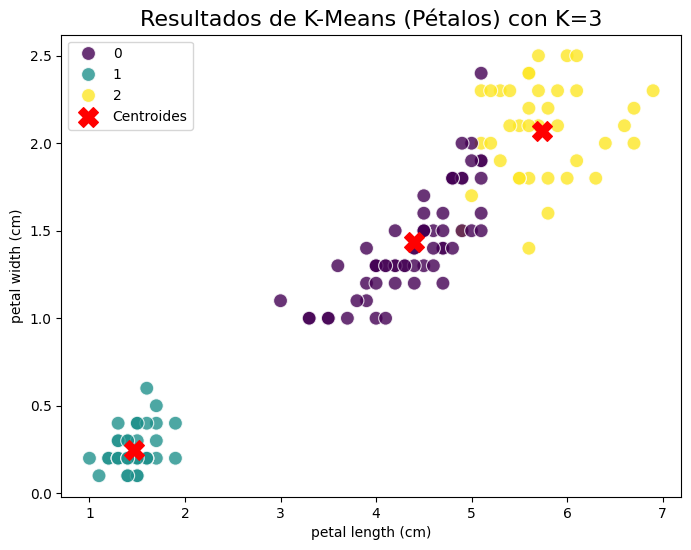

In [30]:
# GRÁFICO 2: PÉTALOS (Petal Length vs Petal Width)
# Análisis Visual: observamos cómo los mismos grupos se ven diferentes según la vista.

print("\nGenerando gráfico para PÉTALOS...")
plt.figure(figsize=(8, 6))

# Usamos seaborn para facilitar el coloreado por categoría (hue)
sns.scatterplot(
    data=data_2,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster', # Colorear según el grupo asignado
    palette='viridis', # Paleta de colores distintiva
    s=100, # Tamaño de los puntos
    alpha=0.8 # Transparencia
)

# También graficamos los CENTROIDES para ver dónde quedaron
plt.scatter(
    kmeans.cluster_centers_[:, 2], # X del centroide (Largo Pétalo)
    kmeans.cluster_centers_[:, 3], # Y del centroide (Ancho Pétalo)
    c='red', s=200, marker='X', label='Centroides' # Marca roja grande
)

plt.title("Resultados de K-Means (Pétalos) con K=3", fontsize=16)
plt.legend()
plt.show()

# Extra 3D

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# 3 # --------------------------------------------------------
# 4 # Visualización 3D Interactiva con Plotly
# 5 # --------------------------------------------------------

print("\n--- Visualización 3D Interactiva (Plotly) ---")

centros = kmeans.cluster_centers_
inercia = kmeans.inertia_
etiquetas = kmeans.labels_

# 12 # Creamos una figura vacia
fig = go.Figure()

# 15 # Agregamos los PUNTOS (Muestras)
# 16 # Usamos: x=Largo Sépalo, y=Ancho Sépalo, z=Largo Pétalo
fig.add_trace(go.Scatter3d(
    x=data_2.iloc[:, 0],
    y=data_2.iloc[:, 1],
    z=data_2.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=etiquetas,       # Colorear según cluster
        colorscale='Viridis',  # Esquema de color
        opacity=0.8
    ),
    name='Muestras'
))

# Agregamos los CENTROIDES
fig.add_trace(go.Scatter3d(
    x=centros[:, 0],
    y=centros[:, 1],
    z=centros[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color='red',
        symbol='x', # Marcador tipo X
    ),
    name='Centroides'
))

# Configuramos titulos y ejes
fig.update_layout(
    title="Clusterización Iris 3D Interactiva (Mueveme con el mouse)",
    scene=dict(
        xaxis_title='Largo Sépalo',
        yaxis_title='Ancho Sépalo',
        zaxis_title='Largo Pétalo'
    ),
    margin=dict(l=0, r=0, b=0, t=40) # Ajustar márgenes
)

# Mostrar gráfico
fig.show()


--- Visualización 3D Interactiva (Plotly) ---
